# Sales Performance Analysis of Retail Malls in Istanbul

This notebook analyzes retail mall sales data from Istanbul to uncover trends in mall performance, customer purchasing behavior, and overall revenue contribution.
# Objective
The objective of this analysis is to answer the following business questions:
- Which product categories generate the highest revenue?
- Which malls generate the highest revenue??
- How concentrated is customer spending?


In [1]:
#Import 
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [ ]:
df = pd.read_csv(r'C:\Users\5411\Desktop\Portfolio Project\customer_shopping_data.csv')
df.head()
### Key Columns
#- category – Category of the product
#- `price` – Revenue of the product
#- `quantity` – Number of units sold

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## Data Cleaning
Before analysis, the dataset is cleaned to ensure accuracy and consistency.  
The following steps are performed:
- Remove duplicate records
- Checked for missing values
- Verified data types
- Created aggregated datasets for analysis

In [ ]:
#Percenatge of Missing Data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing)  )

invoice_no - 0.0%
customer_id - 0.0%
gender - 0.0%
age - 0.0%
category - 0.0%
quantity - 0.0%
price - 0.0%
payment_method - 0.0%
invoice_date - 0.0%
shopping_mall - 0.0%


In [3]:
#Verifying Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [ ]:
#Sorting Values based on Price
df.sort_values(by=['price'], inplace=False, ascending=False)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
26201,I321861,C140969,Male,30,Technology,5,5250.00,Debit Card,23/12/2021,Istinye Park
86791,I989037,C873836,Female,54,Technology,5,5250.00,Cash,16/03/2022,Metrocity
86793,I292024,C142240,Female,50,Technology,5,5250.00,Cash,14/03/2021,Istinye Park
41870,I258591,C174024,Female,27,Technology,5,5250.00,Cash,9/11/2022,Metropol AVM
7559,I148353,C138646,Female,38,Technology,5,5250.00,Cash,13/09/2022,Kanyon
...,...,...,...,...,...,...,...,...,...,...
68116,I890429,C171182,Female,54,Food & Beverage,1,5.23,Credit Card,20/04/2021,Metropol AVM
68131,I434373,C291211,Male,67,Food & Beverage,1,5.23,Cash,3/6/2021,Kanyon
10738,I173726,C141669,Female,26,Food & Beverage,1,5.23,Credit Card,7/7/2021,Mall of Istanbul
50272,I732484,C220354,Male,19,Food & Beverage,1,5.23,Debit Card,3/5/2021,Forum Istanbul


In [5]:

df['customer_id'].drop_duplicates().sort_values(ascending=False)
print(df.duplicated().sum())

0


### Revenue Analysis
- Computed total revenue by mall
- Calculated percentage contribution of each mall
- Identified top-performing locations

In [ ]:
#revenue_by_mall = df.groupby('shopping_mall')['price'].sum().sort_values(ascending=False)
revenue_by_mall = (df.groupby('shopping_mall', as_index=False).agg(total_revenue=('price', 'sum')))
#revenue_millions= revenue_by_mall/1000000
total_revenue = revenue_by_mall['total_revenue'].sum()
revenue_by_mall['revenue_share_%'] = (revenue_by_mall['total_revenue'] / total_revenue * 100)
revenue_by_mall = revenue_by_mall.sort_values(by='revenue_share_%',ascending=False)
revenue_by_mall
#Aggregated the revenue share for each mall as a percentage of the total revenue.



,shopping_mall,total_revenue,revenue_share_%
5,Mall of Istanbul,13851737.62,20.206363
4,Kanyon,13710755.24,20.000703
6,Metrocity,10249980.07,14.952262
7,Metropol AVM,6937992.99,10.120868
3,Istinye Park,6717077.54,9.798605
9,Zorlu Center,3509649.02,5.119736
0,Cevahir AVM,3433671.84,5.008904
8,Viaport Outlet,3414019.46,4.980235
1,Emaar Square Mall,3390408.31,4.945792
2,Forum Istanbul,3336073.82,4.866532


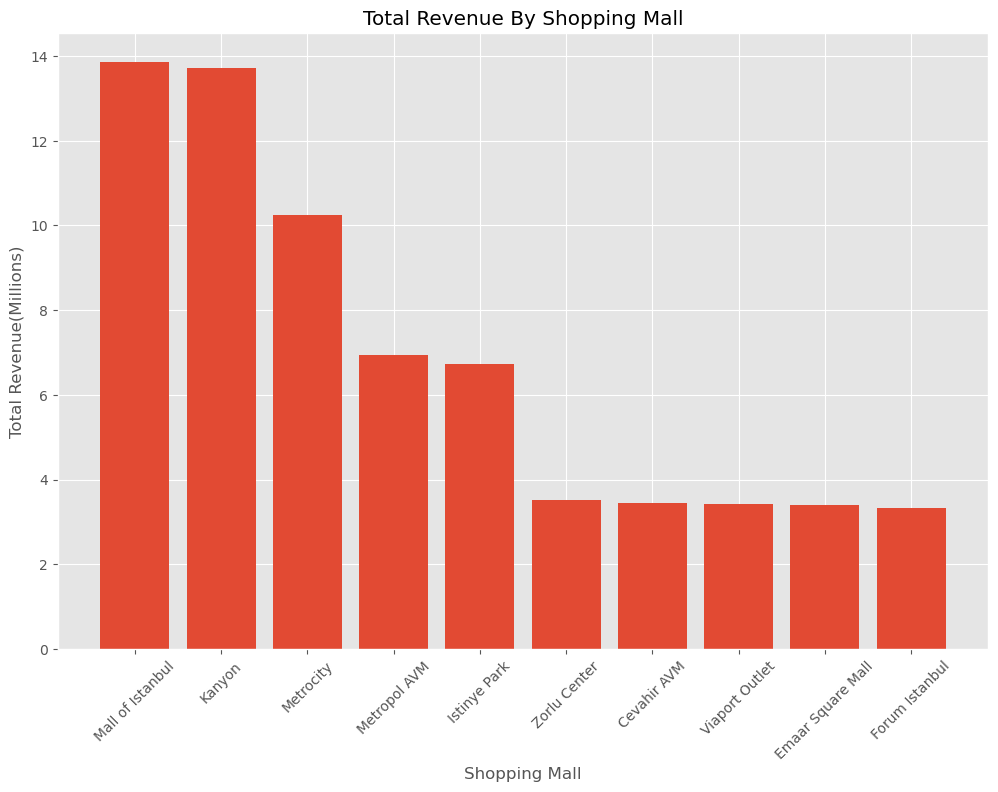

In [7]:
plt.figure()
plt.bar(revenue_millions.index, revenue_millions.values)
plt.title('Total Revenue By Shopping Mall')
plt.xlabel('Shopping Mall')
plt.ylabel('Total Revenue(Millions)')
plt.xticks(rotation=45)
plt.show()

In [8]:
revenue_by_category = df.groupby('category')['price'].sum().sort_values(ascending=False)
print(revenue_by_category)
revenue_millions_category= revenue_by_category/1000000

category
Clothing           31075684.64
Shoes              18135336.89
Technology         15772050.00
Cosmetics           1848606.90
Toys                1086704.64
Food & Beverage      231568.71
Books                226977.30
Souvenir             174436.83
Name: price, dtype: float64


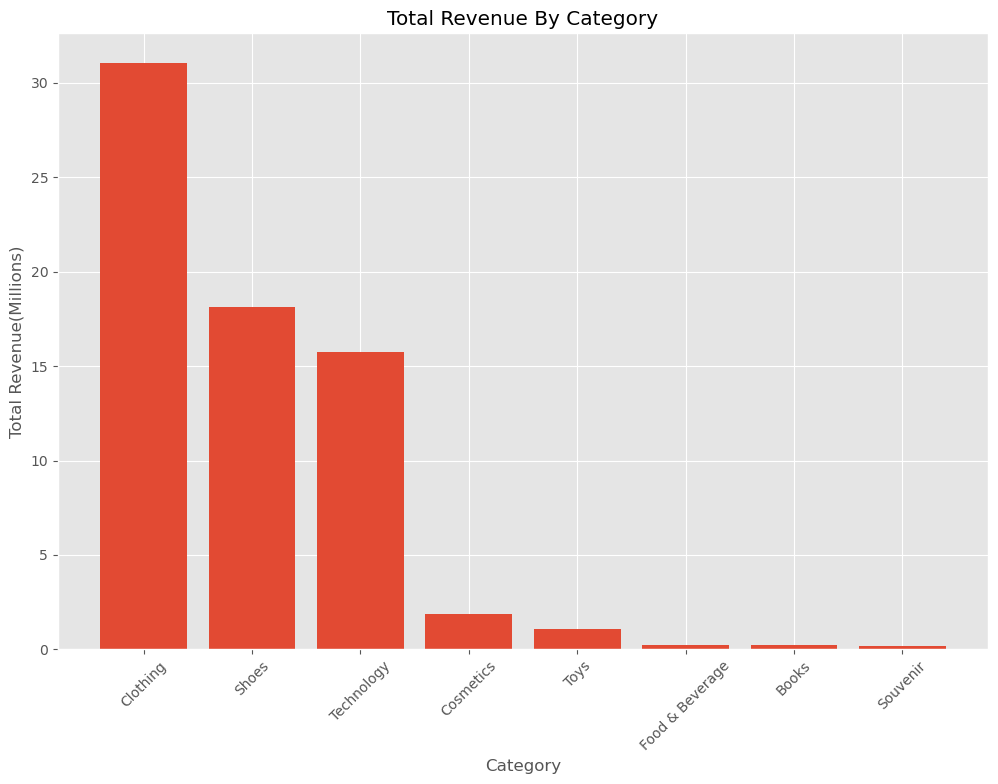

In [9]:
plt.figure()
plt.bar(revenue_millions_category.index, revenue_millions_category.values)
plt.title('Total Revenue By Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue(Millions)')
plt.xticks(rotation=45)
plt.show()

In [10]:
mall_category_revenue = df.groupby(['shopping_mall','category'])['price'].sum().reset_index()
print(mall_category_revenue)

   shopping_mall         category       price
0    Cevahir AVM            Books    11998.80
1    Cevahir AVM         Clothing  1554414.40
2    Cevahir AVM        Cosmetics    88394.84
3    Cevahir AVM  Food & Beverage    11992.39
4    Cevahir AVM            Shoes   884050.41
..           ...              ...         ...
75  Zorlu Center  Food & Beverage    11589.68
76  Zorlu Center            Shoes   953670.13
77  Zorlu Center         Souvenir     8398.68
78  Zorlu Center       Technology   803250.00
79  Zorlu Center             Toys    54691.84

[80 rows x 3 columns]


### Category Performance
- Compared revenue and quantity across categories
- Calculated average unit price per category
- Identified high-value vs high-volume categories

In [11]:
pivot_table = mall_category_revenue.pivot(index='shopping_mall',columns='category',values='price').fillna(0)
print(pivot_table)
top_category_per_mall = (mall_category_revenue.sort_values('price', ascending=False).groupby('shopping_mall').first())
print(top_category_per_mall)


category              Books    Clothing  Cosmetics  Food & Beverage  \
shopping_mall                                                         
Cevahir AVM        11998.80  1554414.40   88394.84         11992.39   
Emaar Square Mall  11059.50  1511803.04   92379.52         11030.07   
Forum Istanbul     11453.40  1572119.12   95225.72         10836.56   
Istinye Park       20725.20  3050313.20  178741.36         23419.94   
Kanyon             44980.35  6155541.04  372242.30         45474.85   
Mall of Istanbul   46949.85  6245565.04  373787.38         46431.94   
Metrocity          34405.65  4719958.32  272422.00         35375.72   
Metropol AVM       22240.20  3166444.16  185775.54         23984.78   
Viaport Outlet     10908.00  1530708.08   92664.14         11432.78   
Zorlu Center       12256.35  1568818.24   96974.10         11589.68   

category                Shoes  Souvenir  Technology       Toys  
shopping_mall                                                   
Cevahir AVM      

### Customer Concentration
- Ranked customers by total spending
- Measured revenue share of top 20% customers
- Assessed dependency risk

In [26]:
customer_price_revenue_id = df.groupby('customer_id')['price'].sum().describe()
print(customer_price_revenue_id)
customer_price_revenue = df.groupby('customer_id')['price'].sum().sort_values(ascending=False)
customer_revenue = customer_price_revenue.reset_index()
threshold = customer_revenue['price'].quantile(0.80)
high_spenders = customer_revenue[
    customer_revenue['price'] >= threshold
].count()

high_spenders
print(high_spenders/df['customer_id'].count()*100)


count    99457.000000
mean       689.256321
std        941.184567
min          5.230000
25%         45.450000
50%        203.300000
75%       1200.320000
max       5250.000000
Name: price, dtype: float64
customer_id    26.03135
price          26.03135
dtype: float64


In [ ]:
category_summary = (df.groupby('category').agg(total_quantity=('quantity', 'sum'), total_revenue=('price', 'sum')))
category_summary['unit_price'] = (category_summary['total_revenue'] /category_summary['total_quantity'])
category_summary.sort_values('total_quantity', ascending=False)
category_summary.sort_values('total_revenue', ascending=False)
category_summary = category_summary.reset_index()


,category,total_quantity,total_revenue,unit_price
0,Books,14982,226977.30,15.15
1,Clothing,103558,31075684.64,300.08
2,Cosmetics,45465,1848606.90,40.66
3,Food & Beverage,44277,231568.71,5.23
4,Shoes,30217,18135336.89,600.17
5,Souvenir,14871,174436.83,11.73
6,Technology,15021,15772050.00,1050.00
7,Toys,30321,1086704.64,35.84


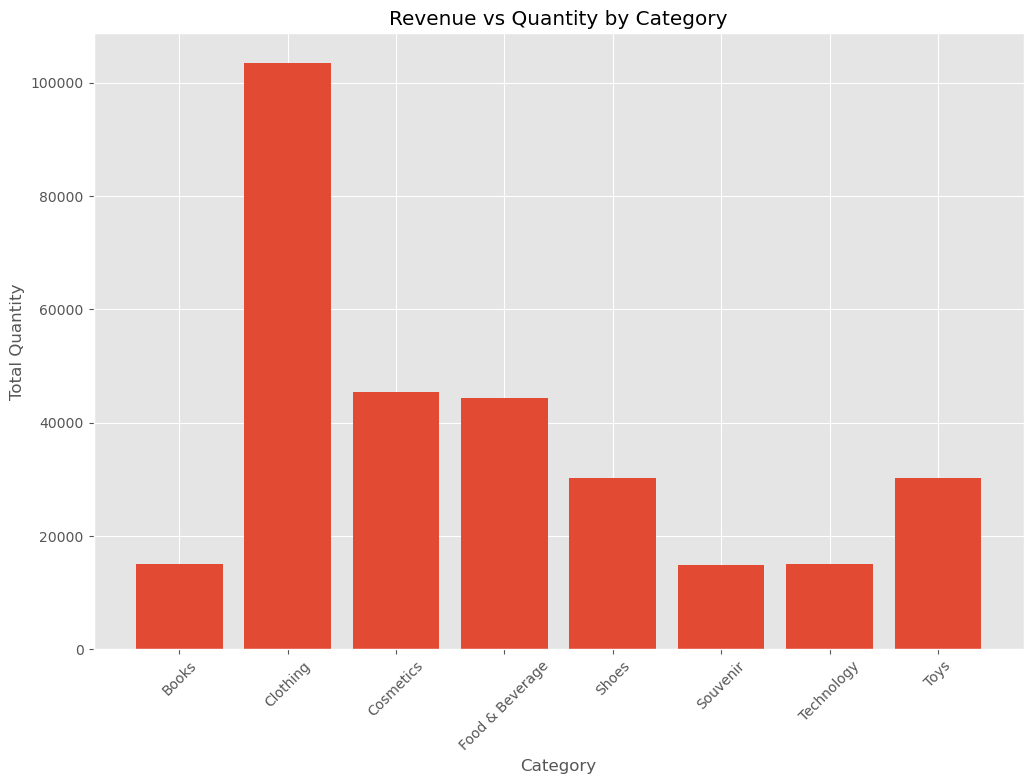

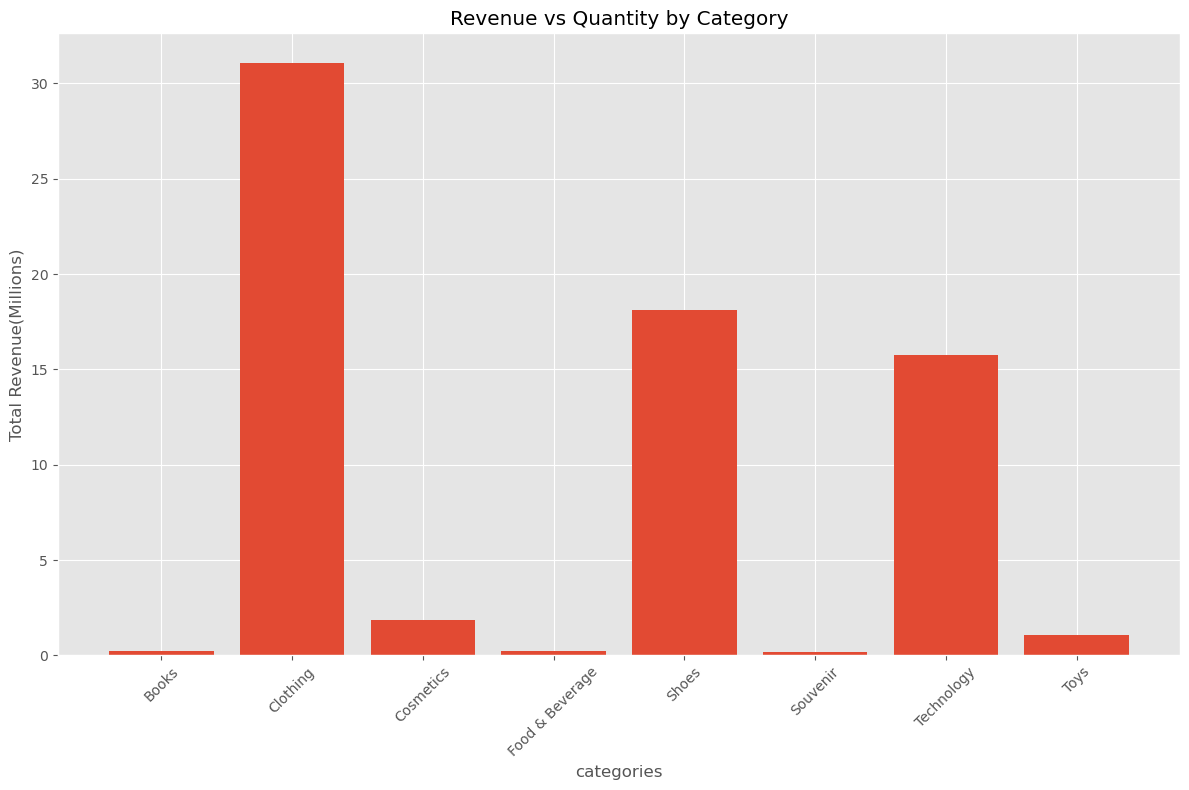

In [32]:

plt.bar(category_summary['category'], category_summary['total_quantity'])
plt.ylabel('Total Quantity')
plt.xlabel('Category')
plt.title('Revenue vs Quantity by Category')
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()
plt.clf()

plt.bar(category_summary['category'], category_summary['total_revenue']/1000000)
plt.ylabel('Total Revenue(Millions)')
plt.xlabel('categories')

plt.title('Revenue vs Quantity by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
mall_total_revenue = (
    mall_category_revenue.groupby('shopping_mall')['price'].sum().reset_index(name='mall_total_revenue')
)
dependence = top_category_per_mall.merge(mall_total_revenue, on='shopping_mall')

dependence['top_category_share'] = (dependence['price'] / dependence['mall_total_revenue']
)

dependence[['shopping_mall', 'category', 'top_category_share']]

,shopping_mall,category,top_category_share
0,Cevahir AVM,Clothing,0.452697
1,Emaar Square Mall,Clothing,0.445906
2,Forum Istanbul,Clothing,0.471248
3,Istinye Park,Clothing,0.454113
4,Kanyon,Clothing,0.448957
5,Mall of Istanbul,Clothing,0.450887
6,Metrocity,Clothing,0.460485
7,Metropol AVM,Clothing,0.456392
8,Viaport Outlet,Clothing,0.448360
9,Zorlu Center,Clothing,0.447001


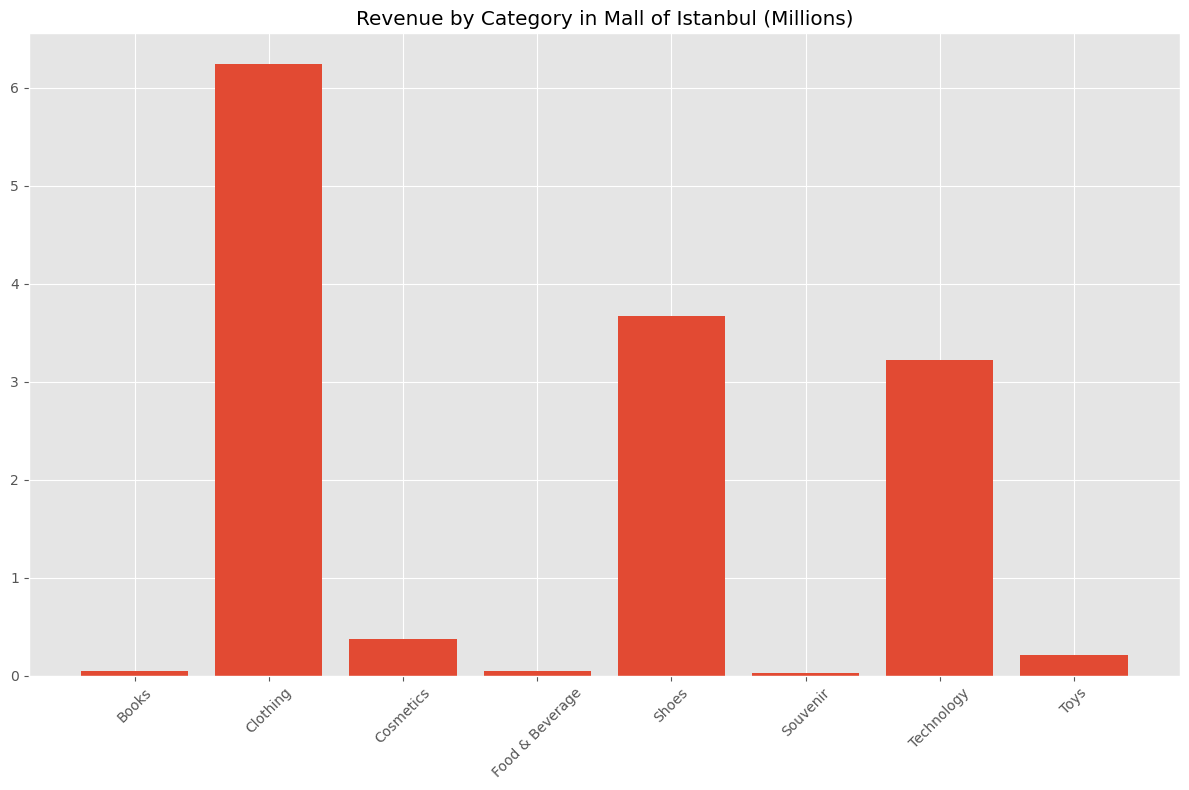

In [16]:
mall_name = 'Mall of Istanbul'

mall_data = mall_category_revenue[
    mall_category_revenue['shopping_mall'] == mall_name
]

plt.figure()
plt.bar(mall_data['category'], mall_data['price']/1000000)
plt.title(f'Revenue by Category in {mall_name} (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Key Takeaways
- Revenue is moderately concentrated by mall and category
- Malls have a moderate dependency on  category(Clothing) 
- Customer spending is distributed but still skewed toward top buyers
- Top 3 malls generating the most revenue;Mall of Istanbul, Kanyon and MetroCity

In [17]:
category_summary.to_csv("category_summary.csv", index=False)
customer_revenue.to_csv("customer_revenue.csv", index=False)